In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

# Load Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data-rekap-kasus-covid19-per-kelurahan-di-provinsi-dki-jakarta-tanggal-1-april-2020-pukul-1800.csv')
df.head()

,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation,keterangan
0,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,993,90,903,207,120,87,159,140,1,8,10,NaN
1,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,296,66,230,187,130,57,116,66,6,10,34,NaN
2,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,3,1,2,11,11,0,19,10,1,1,7,NaN
3,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,0,0,0,12,12,0,17,1,0,0,16,NaN
4,3172061001,DKI JAKARTA,JAKARTA UTARA,KELAPA GADING,KELAPA GADING TIMUR,6,0,6,12,10,2,15,5,3,3,4,NaN


# Data Cleaning

## Handling Missing Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_kel              269 non-null    object 
 1   nama_provinsi       269 non-null    object 
 2   nama_kota           269 non-null    object 
 3   nama_kecamatan      269 non-null    object 
 4   nama_kelurahan      269 non-null    object 
 5   odp                 269 non-null    int64  
 6   proses_pemantauan   269 non-null    int64  
 7   selesai_pemantauan  269 non-null    int64  
 8   pdp                 269 non-null    int64  
 9   masih_dirawat       269 non-null    int64  
 10  pulang_dan_sehat    269 non-null    int64  
 11  positif             269 non-null    int64  
 12  dirawat             269 non-null    int64  
 13  sembuh              269 non-null    int64  
 14  meninggal           269 non-null    int64  
 15  self_isolation      269 non-null    int64  
 16  keterang

In [5]:
df.isnull().sum()

id_kel                  0
nama_provinsi           0
nama_kota               0
nama_kecamatan          0
nama_kelurahan          0
odp                     0
proses_pemantauan       0
selesai_pemantauan      0
pdp                     0
masih_dirawat           0
pulang_dan_sehat        0
positif                 0
dirawat                 0
sembuh                  0
meninggal               0
self_isolation          0
keterangan            269
dtype: int64

In [6]:
missing_value_columns = []

# Iteration
for i in df.columns:
    # Mengambil unique value pada setiap kolom yang dilakukan iterasi
    column_loop = df[i].unique().tolist()
    # Check dua arah
    # 1. Apakah ada " " didalam kolom
    # 2. Apakah ada nan didalam kolom
    if " " in column_loop or sum([1 if str(x) == "nan" else 0 for x in column_loop]) > 0:
        # Jika ada, append nama kolomnya kesini
        missing_value_columns.append(i)

# Print isinya
print(missing_value_columns)

['keterangan']


Drop kolom 'keterangan' 

In [7]:
df = df.drop(columns=['keterangan'])


In [8]:
df.columns

Index(['id_kel', 'nama_provinsi', 'nama_kota', 'nama_kecamatan',
       'nama_kelurahan', 'odp', 'proses_pemantauan', 'selesai_pemantauan',
       'pdp', 'masih_dirawat', 'pulang_dan_sehat', 'positif', 'dirawat',
       'sembuh', 'meninggal', 'self_isolation'],
      dtype='object')

## Check Duplicated

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation
0,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,BELUM DIKETAHUI,993,90,903,207,120,87,159,140,1,8,10
1,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,LUAR DKI JAKARTA,296,66,230,187,130,57,116,66,6,10,34
2,3173061005,DKI JAKARTA,JAKARTA BARAT,KALI DERES,PEGADUNGAN,3,1,2,11,11,0,19,10,1,1,7
3,3174071006,DKI JAKARTA,JAKARTA SELATAN,KEBAYORAN BARU,SENAYAN,0,0,0,12,12,0,17,1,0,0,16
4,3172061001,DKI JAKARTA,JAKARTA UTARA,KELAPA GADING,KELAPA GADING TIMUR,6,0,6,12,10,2,15,5,3,3,4


# Exploratory Data Analysis

## Univariate Analysis

### Statistical Summary

In [11]:
# Mengelompokkan Kolom

df_categorical = df.select_dtypes(exclude = ["int64","float64"])
df_numerical = df.select_dtypes(include = ["int64","float64"])



1.   `df_numerical` berisikan kolom dengan tipe data numeric saja
2.   `df_categorical` berisikan kolom dengan tipe data kategorical saja



In [12]:
df_categorical.describe()

,id_kel,nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan
count,269,269,269,269,269
unique,269,3,8,46,269
top,BELUM DIKETAHUI,DKI JAKARTA,JAKARTA SELATAN,TAMBORA,BELUM DIKETAHUI
freq,1,267,65,11,1


* `id_kel` adalah unique value
* `nama_provinsi` memiliki jumlah rows yang paling banyak
* Berdasarkan `nama_kota`, pasien banyak yang berasal dari JAKARTA SELATAN 

In [13]:
for col in df_categorical:
  print(col,"\n",df[col].describe(),"\n", df[col].value_counts(),"\n")

id_kel 
 count                 269
unique                269
top       BELUM DIKETAHUI
freq                    1
Name: id_kel, dtype: object 
 BELUM DIKETAHUI    1
3172031006         1
3173031007         1
3172011002         1
3174071004         1
                  ..
3174041007         1
3171061002         1
3175041007         1
3174041003         1
3101021001         1
Name: id_kel, Length: 269, dtype: int64 

nama_provinsi 
 count             269
unique              3
top       DKI JAKARTA
freq              267
Name: nama_provinsi, dtype: object 
 DKI JAKARTA         267
BELUM DIKETAHUI       1
LUAR DKI JAKARTA      1
Name: nama_provinsi, dtype: int64 

nama_kota 
 count                 269
unique                  8
top       JAKARTA SELATAN
freq                   65
Name: nama_kota, dtype: object 
 JAKARTA SELATAN       65
JAKARTA TIMUR         65
JAKARTA BARAT         56
JAKARTA PUSAT         44
JAKARTA UTARA         31
KAB.ADM.KEP.SERIBU     6
BELUM DIKETAHUI        1
LUAR DKI JA

Contoh countplot untuk kolom Categorical

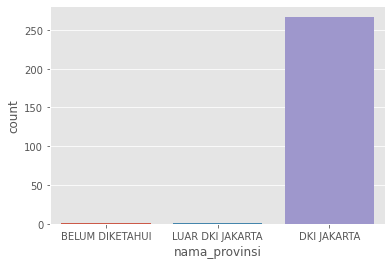

In [14]:
sns.countplot(data=df, x='nama_provinsi')

In [15]:
nums  = list(df_numerical)
nums

['odp',
 'proses_pemantauan',
 'selesai_pemantauan',
 'pdp',
 'masih_dirawat',
 'pulang_dan_sehat',
 'positif',
 'dirawat',
 'sembuh',
 'meninggal',
 'self_isolation']

In [16]:
df_numerical.head()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation
0,993,90,903,207,120,87,159,140,1,8,10
1,296,66,230,187,130,57,116,66,6,10,34
2,3,1,2,11,11,0,19,10,1,1,7
3,0,0,0,12,12,0,17,1,0,0,16
4,6,0,6,12,10,2,15,5,3,3,4


In [17]:
df_numerical.describe()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,8.899628,1.851301,7.048327,4.449814,3.063197,1.386617,3.033457,1.855019,0.189591,0.334572,0.654275
std,63.022097,7.601564,56.649036,16.969526,10.821125,6.376201,12.145372,9.494175,0.583769,0.953956,2.486417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,4.000000,4.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
max,993.000000,90.000000,903.000000,207.000000,130.000000,87.000000,159.000000,140.000000,6.000000,10.000000,34.000000


* Semua kolom menunjukkan Mean > 50% (Median) yang dimana menunjukkan semua kolom tersebut memiliki positive skewed distribution

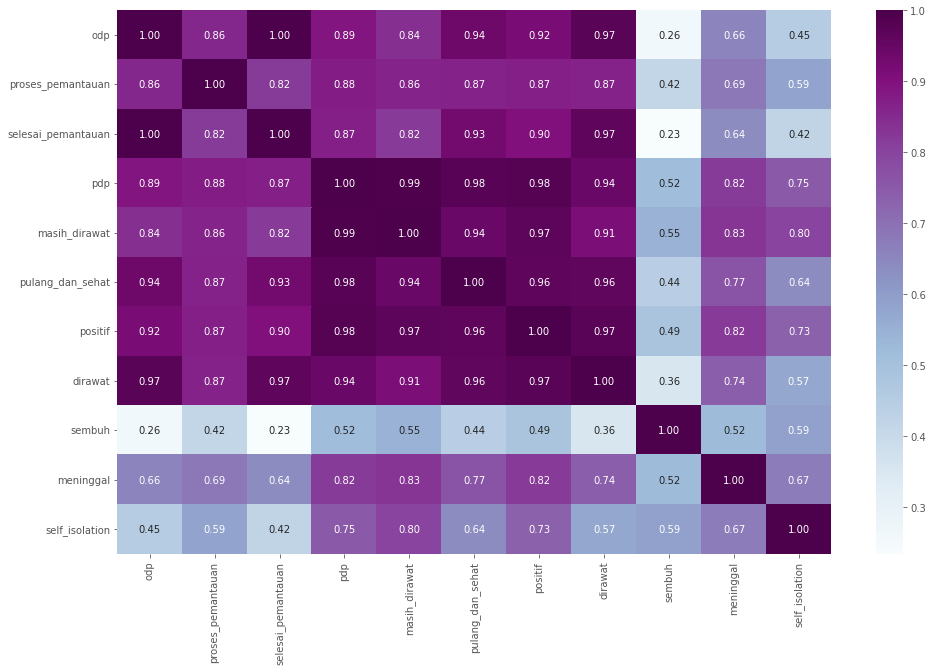

In [18]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Observation:
1. Dapat disimpulkan bahwa terdapat korelasi yang positif antar variable
2. Terdapat banyak korelasi antar variabel yang sangat kuat karena berada diatas 0,8, sedangkan apabila diasumsikan bahwa nilai multikolinearitas di atas 0.85, maka terpadat multikolinearitas antara banyak variabel diatas


# Data Preprocessing for Machine Learning

## Categorical


Drop `id_kel`, `nama_kecamatan`, `nama_kelurahan`

In [19]:
df_categorical = df_categorical.drop(["id_kel", "nama_kecamatan", "nama_kelurahan"],axis=1)
df_categorical.head(5)

,nama_provinsi,nama_kota
0,BELUM DIKETAHUI,BELUM DIKETAHUI
1,LUAR DKI JAKARTA,LUAR DKI JAKARTA
2,DKI JAKARTA,JAKARTA BARAT
3,DKI JAKARTA,JAKARTA SELATAN
4,DKI JAKARTA,JAKARTA UTARA


In [20]:
feature_labelencoding = []
feature_onehot = []
feature_binary = []

# Iteration
for i in df_categorical.columns:
    test_loop = df_categorical[i].unique().tolist()
    # Logic pada categorical transformation diatas
    if len(test_loop) == 2:
        print(f"{i} is Dichotomous: Yes or No. Strategy: Label Encoder")
        feature_labelencoding.append(i)
    elif 2 < len(test_loop) < 6:
        print(f"{i} has 3 - 6 unique values. Strategy: One-hot Encoding")
        feature_onehot.append(i)
    elif len(test_loop) > 6:
        print(f"{i} has 3 - 6 unique values. Strategy: Binary Encoding")
        feature_binary.append(i)
    else:
        print(f"{i} is Other")

nama_provinsi has 3 - 6 unique values. Strategy: One-hot Encoding
nama_kota has 3 - 6 unique values. Strategy: Binary Encoding


In [21]:
print(f"Label Encoding: {feature_labelencoding}")
print("")
print(f"One-hot Encoding: {feature_onehot}")
print("")
print(f"Binary Encoding: {feature_binary}")

Label Encoding: []

One-hot Encoding: ['nama_provinsi']

Binary Encoding: ['nama_kota']


### One Hot Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for label in feature_onehot:
    encoder_onehot = OneHotEncoder()
    df_categorical[label] = encoder_onehot.fit_transform(df_categorical[label].values.reshape(-1,1)).toarray()

# Hasil
df_categorical.head()
df_categorical

,nama_provinsi,nama_kota
0,1.0,BELUM DIKETAHUI
1,0.0,LUAR DKI JAKARTA
2,0.0,JAKARTA BARAT
3,0.0,JAKARTA SELATAN
4,0.0,JAKARTA UTARA
...,...,...
264,0.0,JAKARTA BARAT
265,0.0,JAKARTA UTARA
266,0.0,JAKARTA SELATAN
267,0.0,JAKARTA BARAT


In [23]:
df_categorical['nama_kota'].value_counts().reset_index()

,index,nama_kota
0,JAKARTA SELATAN,65
1,JAKARTA TIMUR,65
2,JAKARTA BARAT,56
3,JAKARTA PUSAT,44
4,JAKARTA UTARA,31
5,KAB.ADM.KEP.SERIBU,6
6,BELUM DIKETAHUI,1
7,LUAR DKI JAKARTA,1


In [24]:
dummies_rs = pd.get_dummies(df_categorical['nama_kota'], drop_first=True) 
dummies_rs.head()

,JAKARTA BARAT,JAKARTA PUSAT,JAKARTA SELATAN,JAKARTA TIMUR,JAKARTA UTARA,KAB.ADM.KEP.SERIBU,LUAR DKI JAKARTA
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0


In [25]:
df_categorical = pd.concat([df_categorical, dummies_rs], axis=1)
df_categorical 

,nama_provinsi,nama_kota,JAKARTA BARAT,JAKARTA PUSAT,JAKARTA SELATAN,JAKARTA TIMUR,JAKARTA UTARA,KAB.ADM.KEP.SERIBU,LUAR DKI JAKARTA
0,1.0,BELUM DIKETAHUI,0,0,0,0,0,0,0
1,0.0,LUAR DKI JAKARTA,0,0,0,0,0,0,1
2,0.0,JAKARTA BARAT,1,0,0,0,0,0,0
3,0.0,JAKARTA SELATAN,0,0,1,0,0,0,0
4,0.0,JAKARTA UTARA,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
264,0.0,JAKARTA BARAT,1,0,0,0,0,0,0
265,0.0,JAKARTA UTARA,0,0,0,0,1,0,0
266,0.0,JAKARTA SELATAN,0,0,1,0,0,0,0
267,0.0,JAKARTA BARAT,1,0,0,0,0,0,0


In [26]:
df_categorical = df_categorical.drop(columns=['nama_kota'])


In [27]:
df_categorical.rename(columns = {'nama_provinsi':'NAMA PROVINSI'}, inplace = True)
df_categorical.head()

,NAMA PROVINSI,JAKARTA BARAT,JAKARTA PUSAT,JAKARTA SELATAN,JAKARTA TIMUR,JAKARTA UTARA,KAB.ADM.KEP.SERIBU,LUAR DKI JAKARTA
0,1.0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,1
2,0.0,1,0,0,0,0,0,0
3,0.0,0,0,1,0,0,0,0
4,0.0,0,0,0,0,1,0,0


## Numerical

In [28]:
df_numerical.head()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation
0,993,90,903,207,120,87,159,140,1,8,10
1,296,66,230,187,130,57,116,66,6,10,34
2,3,1,2,11,11,0,19,10,1,1,7
3,0,0,0,12,12,0,17,1,0,0,16
4,6,0,6,12,10,2,15,5,3,3,4


In [29]:
df_numerical.describe()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,8.899628,1.851301,7.048327,4.449814,3.063197,1.386617,3.033457,1.855019,0.189591,0.334572,0.654275
std,63.022097,7.601564,56.649036,16.969526,10.821125,6.376201,12.145372,9.494175,0.583769,0.953956,2.486417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,4.000000,4.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
max,993.000000,90.000000,903.000000,207.000000,130.000000,87.000000,159.000000,140.000000,6.000000,10.000000,34.000000


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_scaler = StandardScaler()
df_numerical["odp"] = std_scaler.fit_transform(df_numerical["odp"].values.reshape(len(df_numerical), 1))
df_numerical["proses_pemantauan"] = std_scaler.fit_transform(df_numerical["proses_pemantauan"].values.reshape(len(df_numerical), 1))
df_numerical["selesai_pemantauan"] = std_scaler.fit_transform(df_numerical["selesai_pemantauan"].values.reshape(len(df_numerical), 1))
df_numerical["pdp"] = std_scaler.fit_transform(df_numerical["pdp"].values.reshape(len(df_numerical), 1))
df_numerical["pulang_dan_sehat"] = std_scaler.fit_transform(df_numerical["pulang_dan_sehat"].values.reshape(len(df_numerical), 1))
df_numerical["positif"] = std_scaler.fit_transform(df_numerical["positif"].values.reshape(len(df_numerical), 1))
df_numerical["dirawat"] = std_scaler.fit_transform(df_numerical["dirawat"].values.reshape(len(df_numerical), 1))
df_numerical["sembuh"] = std_scaler.fit_transform(df_numerical["sembuh"].values.reshape(len(df_numerical), 1))
df_numerical["meninggal"] = std_scaler.fit_transform(df_numerical["meninggal"].values.reshape(len(df_numerical), 1))
df_numerical["self_isolation"] = std_scaler.fit_transform(df_numerical["self_isolation"].values.reshape(len(df_numerical), 1))



# Result
df_numerical.head()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation
0,15.644270,11.617741,15.845312,11.958361,120,13.452048,12.865580,14.577621,1.390822,8.050389,3.765719
1,4.564042,8.454611,3.943002,10.777581,130,8.738282,9.318537,6.768839,9.971812,10.150830,13.436156
2,-0.093787,-0.112199,-0.089282,0.386716,11,-0.217873,1.317070,0.859492,1.390822,0.698846,2.556914
3,-0.141478,-0.243996,-0.124653,0.445755,12,-0.217873,1.152091,-0.090225,-0.325376,-0.351375,6.183328
4,-0.046095,-0.243996,-0.018540,0.445755,10,0.096378,0.987112,0.331871,4.823218,2.799287,1.348109


## Merge Categorical and Numerical

In [31]:
df_result = pd.concat([df_numerical,df_categorical],axis=1)
df_result.head()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation,NAMA PROVINSI,JAKARTA BARAT,JAKARTA PUSAT,JAKARTA SELATAN,JAKARTA TIMUR,JAKARTA UTARA,KAB.ADM.KEP.SERIBU,LUAR DKI JAKARTA
0,15.644270,11.617741,15.845312,11.958361,120,13.452048,12.865580,14.577621,1.390822,8.050389,3.765719,1.0,0,0,0,0,0,0,0
1,4.564042,8.454611,3.943002,10.777581,130,8.738282,9.318537,6.768839,9.971812,10.150830,13.436156,0.0,0,0,0,0,0,0,1
2,-0.093787,-0.112199,-0.089282,0.386716,11,-0.217873,1.317070,0.859492,1.390822,0.698846,2.556914,0.0,1,0,0,0,0,0,0
3,-0.141478,-0.243996,-0.124653,0.445755,12,-0.217873,1.152091,-0.090225,-0.325376,-0.351375,6.183328,0.0,0,0,1,0,0,0,0
4,-0.046095,-0.243996,-0.018540,0.445755,10,0.096378,0.987112,0.331871,4.823218,2.799287,1.348109,0.0,0,0,0,0,1,0,0


# Machine Learning

Target

In [32]:
df_result['JAKARTA BARAT'].value_counts()

0    213
1     56
Name: JAKARTA BARAT, dtype: int64

Menggunakan Over Sampling karena dirasa data terlalu sedikit

In [33]:
from imblearn import under_sampling, over_sampling

X = df_result.drop('JAKARTA BARAT', axis=1)
y = df_result['JAKARTA BARAT']

# Oversampling with smote
X_under, y_under = over_sampling.SMOTE().fit_resample(X, y)

In [34]:
df_oversampling = pd.concat([X_under, y_under], axis=1)
df_oversampling.head()

,odp,proses_pemantauan,selesai_pemantauan,pdp,masih_dirawat,pulang_dan_sehat,positif,dirawat,sembuh,meninggal,self_isolation,NAMA PROVINSI,JAKARTA PUSAT,JAKARTA SELATAN,JAKARTA TIMUR,JAKARTA UTARA,KAB.ADM.KEP.SERIBU,LUAR DKI JAKARTA,JAKARTA BARAT
0,15.644270,11.617741,15.845312,11.958361,120,13.452048,12.865580,14.577621,1.390822,8.050389,3.765719,1.0,0,0,0,0,0,0,0
1,4.564042,8.454611,3.943002,10.777581,130,8.738282,9.318537,6.768839,9.971812,10.150830,13.436156,0.0,0,0,0,0,0,1,0
2,-0.093787,-0.112199,-0.089282,0.386716,11,-0.217873,1.317070,0.859492,1.390822,0.698846,2.556914,0.0,0,0,0,0,0,0,1
3,-0.141478,-0.243996,-0.124653,0.445755,12,-0.217873,1.152091,-0.090225,-0.325376,-0.351375,6.183328,0.0,0,1,0,0,0,0,0
4,-0.046095,-0.243996,-0.018540,0.445755,10,0.096378,0.987112,0.331871,4.823218,2.799287,1.348109,0.0,0,0,0,1,0,0,0


In [35]:
df_oversampling['JAKARTA BARAT'].value_counts()

0    213
1    213
Name: JAKARTA BARAT, dtype: int64

In [36]:
sm = over_sampling.SMOTE(random_state=42)

X = df_oversampling.drop(['JAKARTA BARAT'],axis = 1)
Y = df_oversampling['JAKARTA BARAT']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (426, 18)
Shape of X after SMOTE: (426, 18)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: JAKARTA BARAT, dtype: float64

Split data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

## Random Forrest

In [38]:
model = RandomForestClassifier(random_state=42)
model.fit(X_under, y_under)
preds = model.predict(X_test)

### Metric Evaluation

Karena sudah balanced data, jadi valid menggunakan akurasi

In [39]:
print('Akurasi',accuracy_score(y_test, preds))

Akurasi 1.0


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

#### Predict

In [41]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=uint8)

#### Evaluation


In [42]:
print('Akurasi',accuracy_score(y_test, y_pred_dt))

Akurasi 1.0


# Hyperparameter Tuning

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [44]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 6.67 s, sys: 0 ns, total: 6.67 s
Wall time: 6.69 s


Membutuhkan waktu sekitar 9.23 detik untuk memproses

In [45]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'max_depth': 5, 'n_estimators': 50}",0.987879,1
19,"{'max_depth': 4, 'n_estimators': 50}",0.987879,1
18,"{'max_depth': 4, 'n_estimators': 40}",0.987879,1
17,"{'max_depth': 4, 'n_estimators': 30}",0.987879,1
4,"{'max_depth': 1, 'n_estimators': 50}",0.987879,1
16,"{'max_depth': 4, 'n_estimators': 20}",0.987879,1
23,"{'max_depth': 5, 'n_estimators': 40}",0.981818,7
9,"{'max_depth': 2, 'n_estimators': 50}",0.981818,7
0,"{'max_depth': 1, 'n_estimators': 10}",0.981818,7
1,"{'max_depth': 1, 'n_estimators': 20}",0.981818,7


Untuk mempercepat proses training, kita coba menggunakan RandomizedSearchCV

In [46]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 2.64 s, sys: 6.5 ms, total: 2.65 s
Wall time: 2.64 s


Sekarang proses training hanya membutuhkan waktu sekitar 5.23 detik

In [47]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,"{'n_estimators': 50, 'max_depth': 4}",0.987879,1
5,"{'n_estimators': 20, 'max_depth': 4}",0.987879,1
6,"{'n_estimators': 40, 'max_depth': 4}",0.987879,1
9,"{'n_estimators': 50, 'max_depth': 1}",0.987879,1
3,"{'n_estimators': 20, 'max_depth': 1}",0.981818,5
1,"{'n_estimators': 20, 'max_depth': 5}",0.969697,6
4,"{'n_estimators': 30, 'max_depth': 1}",0.969697,6
8,"{'n_estimators': 30, 'max_depth': 2}",0.969697,6
2,"{'n_estimators': 20, 'max_depth': 2}",0.969508,9
7,"{'n_estimators': 10, 'max_depth': 2}",0.963636,10


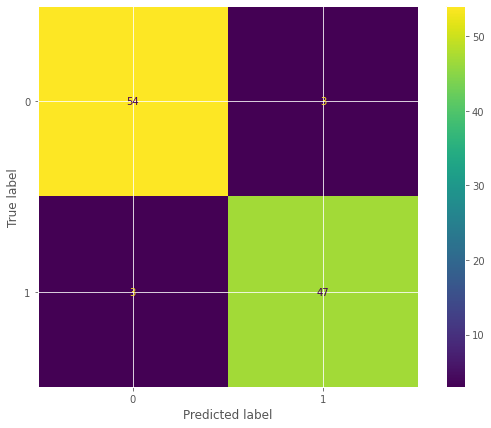

In [48]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [49]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        57
           1       0.94      0.94      0.94        50

    accuracy                           0.94       107
   macro avg       0.94      0.94      0.94       107
weighted avg       0.94      0.94      0.94       107



Interpretasi : Dengan menggunakan metode Random Forest, hasil recall menunjukkan 0.98, artinya dari 100% data, KNN mampu menjelaskan 98% orang yang masuk rumah sakit berasal dari Jawa Barat